In [3]:
#import
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [4]:
#load data
train_2016 = pd.read_csv("downloads/zillow/train_2016.csv", header = 0)
train_2017 = pd.read_csv("downloads/zillow/train_2017.csv", header = 0)
properties_2016 = pd.read_csv("downloads/zillow/properties_2016.csv", header = 0, low_memory=False)
properties_2017 = pd.read_csv("downloads/zillow/properties_2017.csv", header = 0, low_memory=False)

In [5]:
#print shape of the data
print(train_2016.shape)
print(train_2017.shape)
print(properties_2016.shape)
print(properties_2017.shape)

(90275, 3)
(77613, 3)
(2985217, 58)
(2985217, 58)


In [6]:
#merge the data for analysis
#train data of 2016 will be merged with the properties of 2016, same for 2017
#train data of 2016 and 2017 will be merged together
data2016 = pd.merge(train_2016, properties_2016, how = 'left', on = 'parcelid')
data2017 = pd.merge(train_2017, properties_2017, how = 'left', on = 'parcelid')
data = pd.concat([data2016, data2017], axis = 0)
print(data.shape)

(167888, 60)


In [7]:
#data overview
data.head

<bound method NDFrame.head of        parcelid  logerror transactiondate  airconditioningtypeid  \
0      11016594  0.027600      2016-01-01                    1.0   
1      14366692 -0.168400      2016-01-01                    NaN   
2      12098116 -0.004000      2016-01-01                    1.0   
3      12643413  0.021800      2016-01-02                    1.0   
4      14432541 -0.005000      2016-01-02                    NaN   
...         ...       ...             ...                    ...   
77608  10833991 -0.002245      2017-09-20                    1.0   
77609  11000655  0.020615      2017-09-20                    NaN   
77610  17239384  0.013209      2017-09-21                    NaN   
77611  12773139  0.037129      2017-09-21                    1.0   
77612  12826780  0.007204      2017-09-25                    NaN   

       architecturalstyletypeid  basementsqft  bathroomcnt  bedroomcnt  \
0                           NaN           NaN          2.0         3.0   
1    

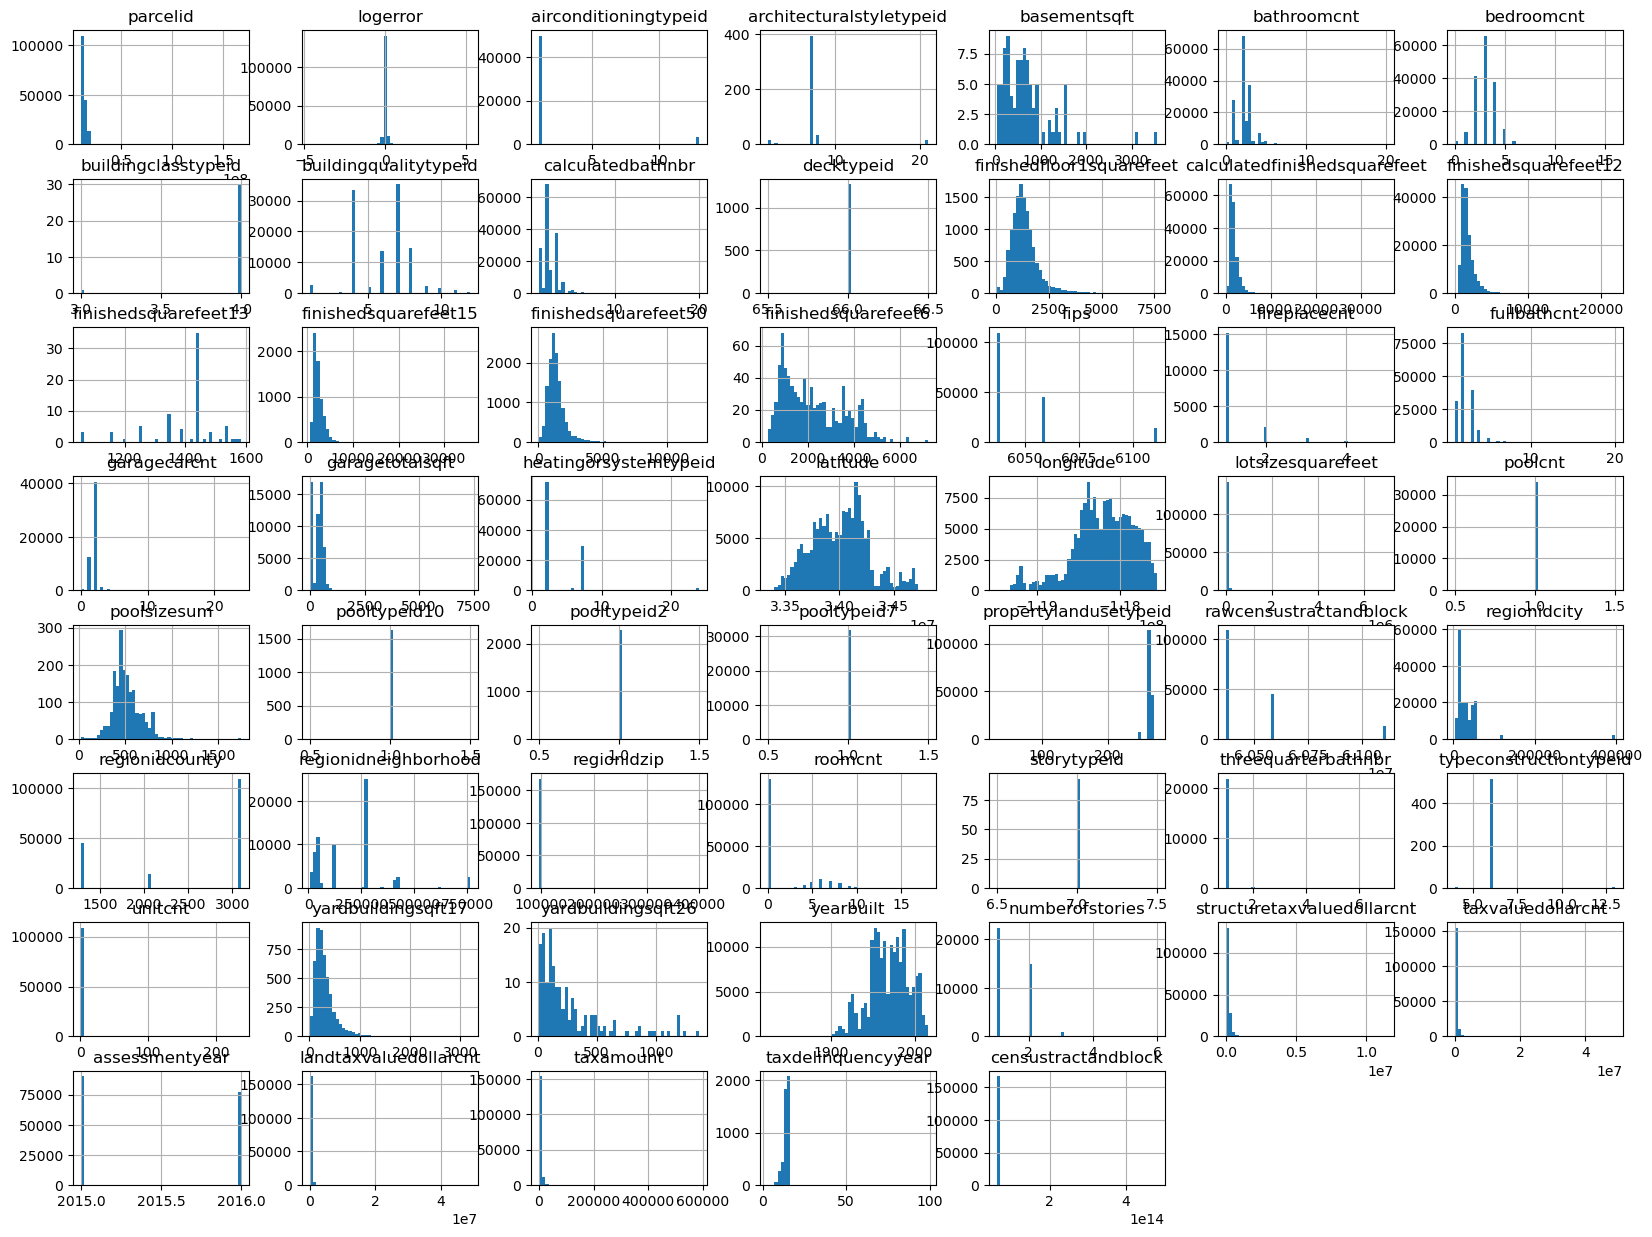

In [8]:
#visualize the parameters so we can understand the data distribution according to the parameters
data.hist(bins=50, figsize=(20,15))
plt.show()

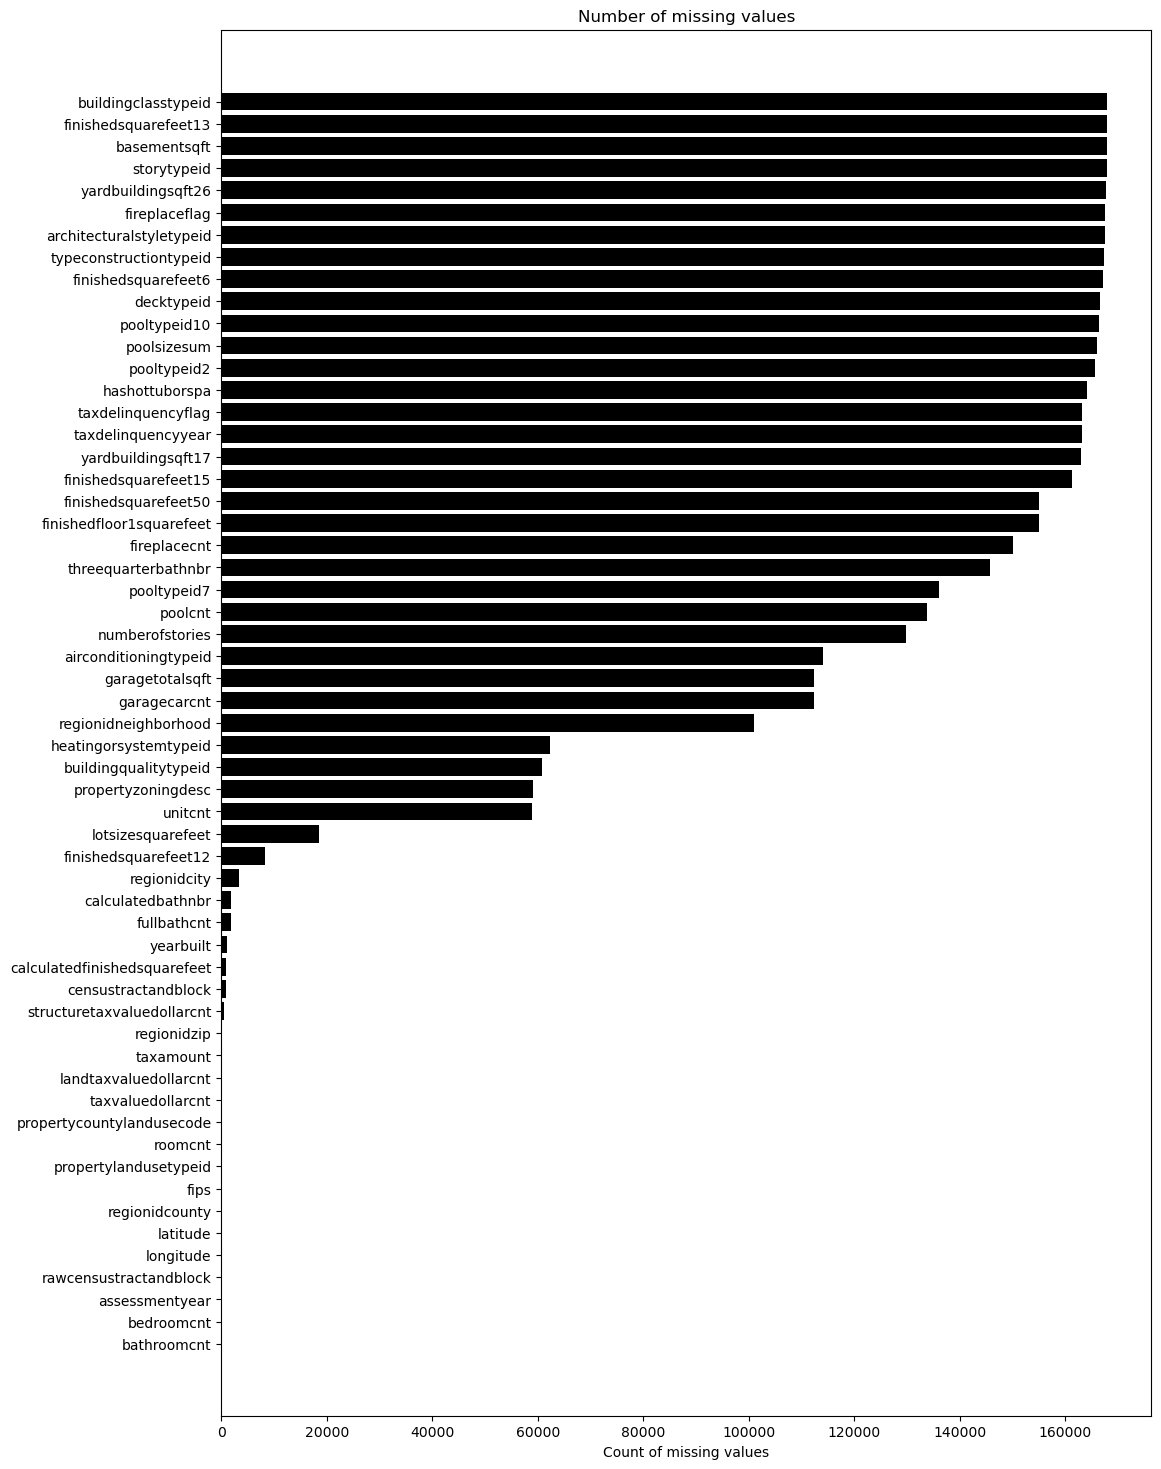

In [9]:
#visually represent the data where columns are null
missingvalues = data.isnull().sum(axis=0).reset_index()
missingvalues.columns = ['column_name', 'missing_count']
missingvalues = missingvalues.loc[missingvalues['missing_count']>0]
missingvalues = missingvalues.sort_values(by='missing_count')

index = np.arange(missingvalues.shape[0])
width = 0.9
fig, ax = plt.subplots(figsize=(12,18))
rects = ax.barh(index, missingvalues.missing_count.values, color='black')
ax.set_yticks(index)
ax.set_yticklabels(missingvalues.column_name.values, rotation='horizontal')
ax.set_xlabel("Count of missing values")
ax.set_title("Number of missing values")
plt.show()

In [10]:
#drop columns that have more than 30% missing data
missing_value_df = pd.DataFrame((data.isnull().sum()/len(data))*100,columns=["missing_value"])
drop_columns_list = missing_value_df.loc[missing_value_df["missing_value"]>30].index.to_list()
print(drop_columns_list)

['airconditioningtypeid', 'architecturalstyletypeid', 'basementsqft', 'buildingclasstypeid', 'buildingqualitytypeid', 'decktypeid', 'finishedfloor1squarefeet', 'finishedsquarefeet13', 'finishedsquarefeet15', 'finishedsquarefeet50', 'finishedsquarefeet6', 'fireplacecnt', 'garagecarcnt', 'garagetotalsqft', 'hashottuborspa', 'heatingorsystemtypeid', 'poolcnt', 'poolsizesum', 'pooltypeid10', 'pooltypeid2', 'pooltypeid7', 'propertyzoningdesc', 'regionidneighborhood', 'storytypeid', 'threequarterbathnbr', 'typeconstructiontypeid', 'unitcnt', 'yardbuildingsqft17', 'yardbuildingsqft26', 'numberofstories', 'fireplaceflag', 'taxdelinquencyflag', 'taxdelinquencyyear']


In [11]:
#drop the columns from the main data
data.drop(columns=drop_columns_list,inplace = True)

In [12]:
#remove duplicate values
duplicateRowsDF = data[data.duplicated(["parcelid"],keep=False)]
print("All Duplicate Rows based on all columns are :")
pd.DataFrame(duplicateRowsDF.head())

All Duplicate Rows based on all columns are :


,parcelid,logerror,transactiondate,bathroomcnt,bedroomcnt,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,fullbathcnt,...,regionidcounty,regionidzip,roomcnt,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,censustractandblock
1,14366692,-0.1684,2016-01-01,3.5,4.0,3.5,2263.0,2263.0,6059.0,3.0,...,1286.0,96962.0,0.0,2014.0,346458.0,585529.0,2015.0,239071.0,10153.02,NaN
10,10854446,0.3825,2016-01-03,2.0,2.0,2.0,1417.0,1417.0,6037.0,2.0,...,3101.0,96426.0,0.0,1954.0,55396.0,105954.0,2015.0,50558.0,1443.69,6.037141e+13
26,11188425,-0.0747,2016-01-03,2.0,2.0,2.0,1302.0,1302.0,6037.0,2.0,...,3101.0,97329.0,0.0,1986.0,80600.0,174000.0,2015.0,93400.0,3895.76,6.037910e+13
31,11624877,-0.0294,2016-01-03,2.0,2.0,2.0,1422.0,1422.0,6037.0,2.0,...,3101.0,96088.0,0.0,1981.0,202000.0,673000.0,2015.0,471000.0,8048.18,6.037269e+13
80,13980837,-0.0253,2016-01-04,3.0,4.0,3.0,2501.0,2501.0,6059.0,3.0,...,1286.0,96978.0,8.0,1961.0,177329.0,1507867.0,2015.0,1330538.0,16414.54,6.059063e+13


In [13]:
#delete duplicate values
unique_train_data = data.sort_values("transactiondate").drop_duplicates("parcelid",keep = "last")

In [14]:
#delete rows with null values
train_data = unique_train_data[unique_train_data["logerror"].notna()]

In [15]:
train_data.drop(columns=["transactiondate"],inplace=True)

In [16]:
#contains unique ids
train_data.set_index('parcelid',inplace= True)

In [17]:
#we don't need target variable in regression model while training
X = train_data.drop(columns = ['logerror'],inplace=False)
#target variable included
y = pd.DataFrame(train_data['logerror'])
#split data train 49%, test 51%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.51, random_state=42)

In [18]:
#converts non-numeric values to NaN for train data
X_train[X_train.columns] = X_train[X_train.columns].apply(pd.to_numeric, errors='coerce')

In [19]:
#impute values with median for train data
X_train = X_train.fillna(X_train.median())

In [20]:
#converts non-numeric values to NaN for train data
X_test[X_test.columns] = X_test[X_test.columns].apply(pd.to_numeric, errors='coerce')

In [21]:
#impute values with median for train data
X_test = X_test.fillna(X_test.median())

In [22]:
X_train.dtypes

bathroomcnt                     float64
bedroomcnt                      float64
calculatedbathnbr               float64
calculatedfinishedsquarefeet    float64
finishedsquarefeet12            float64
fips                            float64
fullbathcnt                     float64
latitude                        float64
longitude                       float64
lotsizesquarefeet               float64
propertycountylandusecode       float64
propertylandusetypeid           float64
rawcensustractandblock          float64
regionidcity                    float64
regionidcounty                  float64
regionidzip                     float64
roomcnt                         float64
yearbuilt                       float64
structuretaxvaluedollarcnt      float64
taxvaluedollarcnt               float64
assessmentyear                  float64
landtaxvaluedollarcnt           float64
taxamount                       float64
censustractandblock             float64
dtype: object

/Users/tanvimurke/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/tanvimurke/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/tanvimurke/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function w

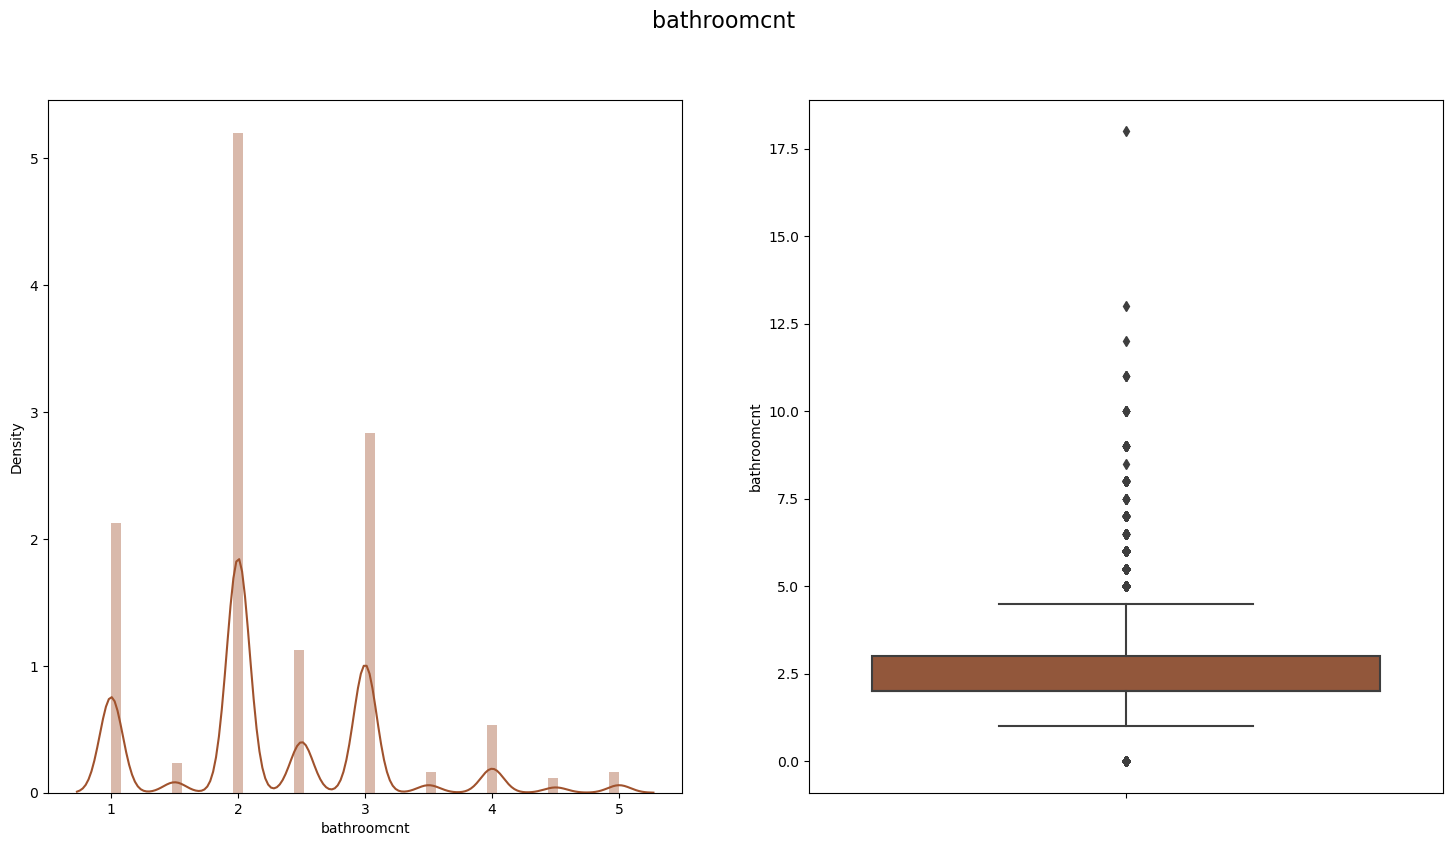

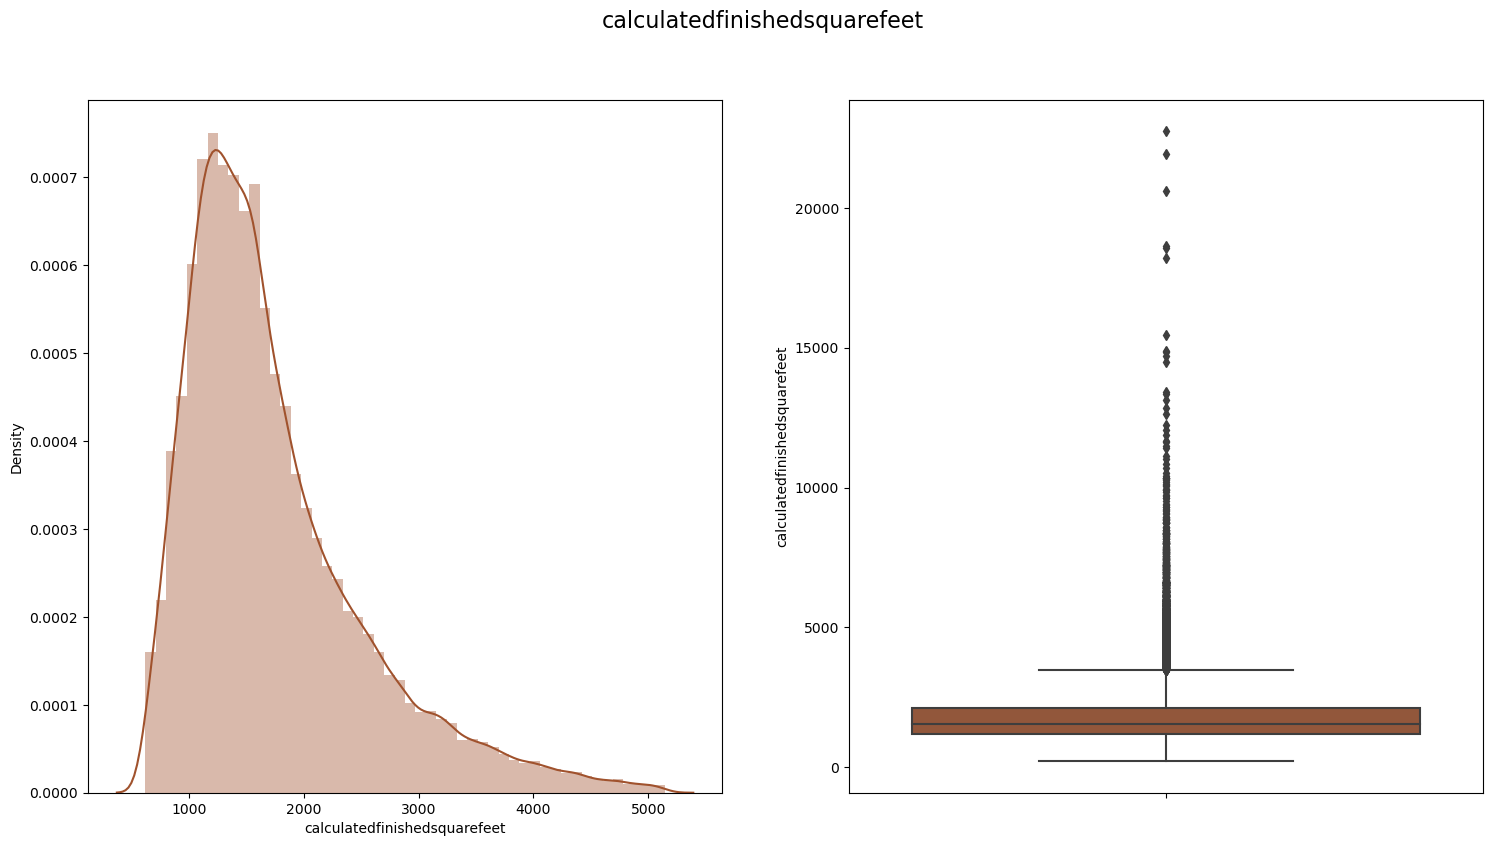

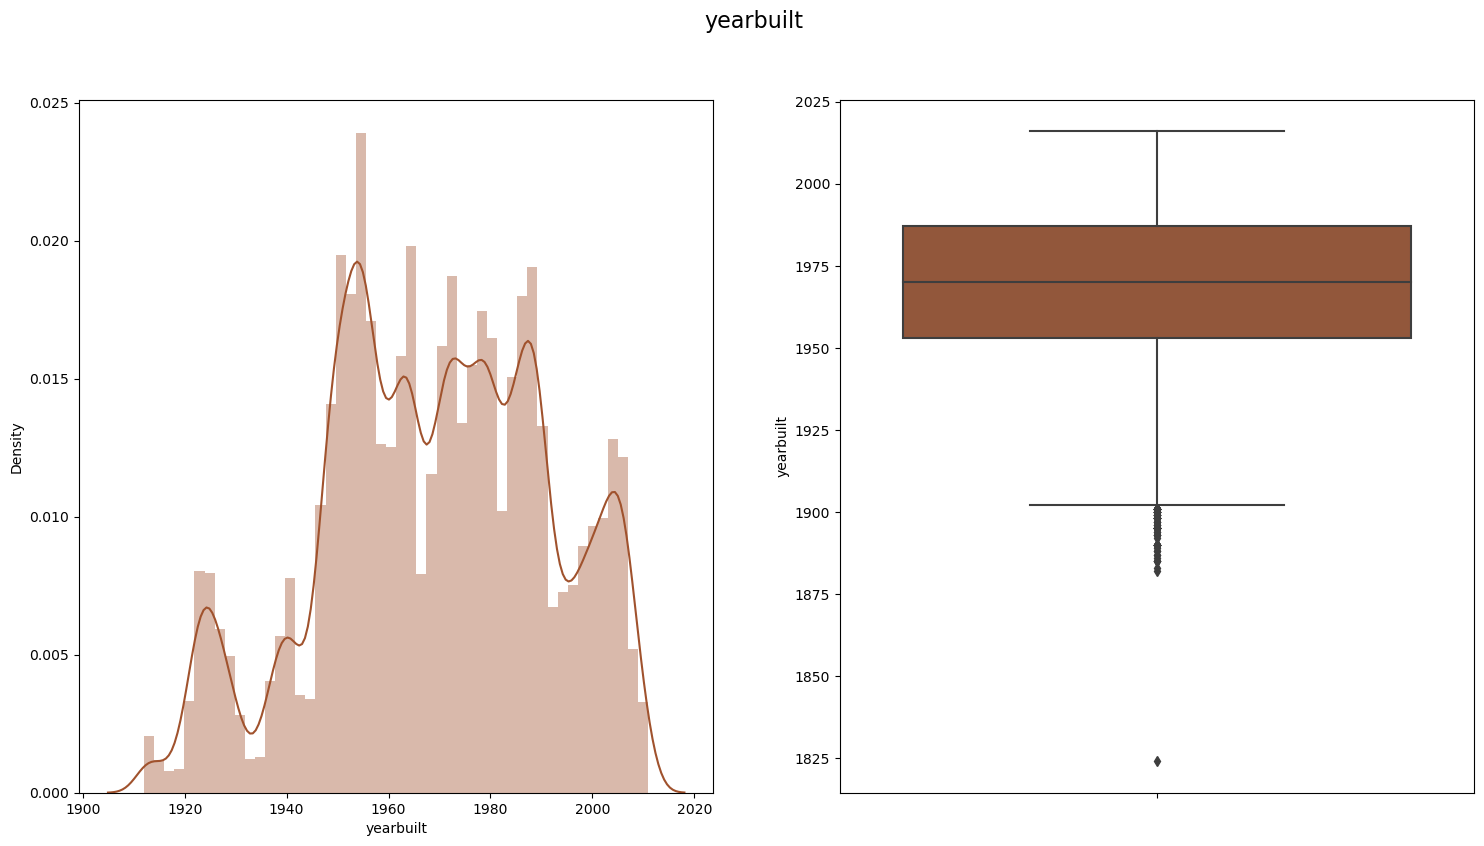

In [23]:
#feature study
features = ['bathroomcnt', 'calculatedfinishedsquarefeet', 'yearbuilt']
for col in features:
    values = X_train[col].dropna()
    lower = np.percentile(values, 1)
    upper = np.percentile(values, 99)
    fig = plt.figure(figsize=(18,9));
    sns.distplot(values[(values>lower) & (values<upper)], color='Sienna', ax = plt.subplot(121));
    sns.boxplot(y=values, color='Sienna', ax = plt.subplot(122));
    plt.suptitle(col, fontsize=16)       

In [24]:
#fitting the linear regression model
from sklearn.linear_model import LinearRegression
regmodel = LinearRegression().fit(X_train, y_train)
y_pred = regmodel.predict(X_test)

In [25]:
#compute mean absolute error
from sklearn import metrics
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,y_pred))

Mean Absolute Error: 0.06834611621197392


In [26]:
#compute the log loss
mean_squared_error = metrics.mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mean_squared_error)

Mean Squared Error: 0.026933756980715345


In [27]:
#fitting the Random Forest Regressor Model
from sklearn.ensemble import RandomForestRegressor
rfrmodel = RandomForestRegressor(n_estimators=100, random_state=42)
rfrmodel.fit(X_train, y_train)
y_pred = rfrmodel.predict(X_test)

/var/folders/gz/48d4h_554811pcq9nyp287340000gn/T/ipykernel_84530/197593649.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfrmodel.fit(X_train, y_train)


In [28]:
#compute mean absolute error
from sklearn import metrics
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,y_pred))

Mean Absolute Error: 0.07418441409140165


In [29]:
#compute the log loss
mean_squared_error = metrics.mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mean_squared_error)

Mean Squared Error: 0.028322217302680044


In [30]:
#conclusion- this shows that linear regression performs better than random forest regressor

In [31]:
#pickle
import pickle

with open("Downloads/reg.model.pkl", "wb") as file:
    pickle.dump(regmodel, file)
